### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [23]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv', delimiter = ',')
#data['MMRCurrentRetailAveragePrice'].head(10)
#data['VehOdo'].head(10)
#data['IsBadBuy'].head(10)
data.head(10)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
5,6,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,...,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
6,7,0,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,...,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533
7,8,0,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825
8,9,0,12/7/2009,ADESA,2007,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482
9,10,0,12/7/2009,ADESA,2007,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,...,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

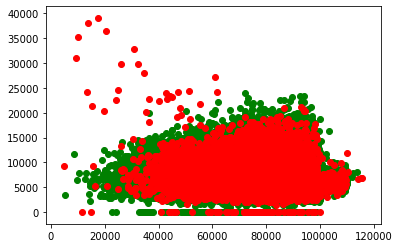

In [4]:
i = data['IsBadBuy'] == 0
x = data.loc[i, ['VehOdo', 'MMRCurrentRetailAveragePrice']]

i = data['IsBadBuy'] == 1
y = data.loc[i, ['VehOdo', 'MMRCurrentRetailAveragePrice']]

plt.scatter(x['VehOdo'], x['MMRCurrentRetailAveragePrice'], c = 'g')
plt.scatter(y['VehOdo'], y['MMRCurrentRetailAveragePrice'], c = 'r')

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [5]:
from sklearn import *

i = pd.notnull(data['VehOdo']) 
tmp = data.loc[i, ['IsBadBuy', 'VehOdo', 'MMRCurrentRetailAveragePrice']]
i = pd.notnull(tmp['MMRCurrentRetailAveragePrice'])
tmp2 = tmp.loc[i, ['IsBadBuy', 'VehOdo', 'MMRCurrentRetailAveragePrice']]
i = pd.notnull(tmp2['IsBadBuy'])
x = tmp2.loc[i, ['VehOdo', 'MMRCurrentRetailAveragePrice']]
y = tmp2.loc[i, 'IsBadBuy']
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [6]:
prediction = model.predict(x)
print(prediction)

[0.12473569 0.13585101 0.14563746 ... 0.12108278 0.12349799 0.07867021]


## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [13]:
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]
print(predictionClass)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [14]:
print(metrics.classification_report(y, predictionClass))
print(metrics.confusion_matrix(y, predictionClass))

C:\Users\Almaz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     63724
           1       0.00      0.00      0.00      8944

    accuracy                           0.88     72668
   macro avg       0.44      0.50      0.47     72668
weighted avg       0.77      0.88      0.82     72668

[[63724     0]
 [ 8944     0]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [15]:
i = pd.notnull(data['VehOdo']) 
tmp = data.loc[i, ['IsBadBuy', 'VehOdo', 'MMRCurrentRetailAveragePrice']]
i = pd.notnull(tmp['MMRCurrentRetailAveragePrice'])
tmp2 = tmp.loc[i, ['IsBadBuy', 'VehOdo', 'MMRCurrentRetailAveragePrice']]
i = pd.notnull(tmp2['IsBadBuy'])
x = tmp2.loc[i, ['VehOdo', 'MMRCurrentRetailAveragePrice']]
y = tmp2.loc[i, 'IsBadBuy']
dtc = tree.DecisionTreeClassifier(max_depth = 20)
dtc.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [16]:
prediction = dtc.predict_proba(x)
print(prediction)

[[0.89317804 0.10682196]
 [1.         0.        ]
 [0.85810056 0.14189944]
 ...
 [0.89317804 0.10682196]
 [0.86746988 0.13253012]
 [0.93789474 0.06210526]]


## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [17]:
predictionClass = [0 if prediction[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]
#print(predictionClass)
print(metrics.classification_report(y, predictionClass))
print(metrics.confusion_matrix(y, predictionClass))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63724
           1       0.94      0.32      0.47      8944

    accuracy                           0.91     72668
   macro avg       0.93      0.66      0.71     72668
weighted avg       0.92      0.91      0.89     72668

[[63557   167]
 [ 6117  2827]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [19]:
i = pd.notnull(data['MMRCurrentRetailAveragePrice'])
X = data.loc[i, ['MMRCurrentRetailAveragePrice', 'VehOdo']].values
y = data.loc[i, 'IsBadBuy'].values

dataTrain, dataTest, resTrain, resTest = model_selection.train_test_split(
    X, y, test_size = 0.5, random_state = 0)

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [20]:
classf1 = tree.DecisionTreeClassifier(max_depth = 10).fit(dataTrain, resTrain)
classf2 = tree.DecisionTreeClassifier(max_depth = 20).fit(dataTrain, resTrain)
classf3 = tree.DecisionTreeClassifier(max_depth = 30).fit(dataTrain, resTrain)

print("Accuracy:", classf1.score(dataTrain, resTrain))
print("Accuracy:", classf2.score(dataTrain, resTrain))
print("Accuracy:", classf3.score(dataTrain, resTrain)) 

print("Accuracy:", classf1.score(dataTest, resTest))
print("Accuracy:", classf2.score(dataTest, resTest))
print("Accuracy:", classf3.score(dataTest, resTest))

Accuracy: 0.8841580888424065
Accuracy: 0.9260472284912203
Accuracy: 0.9717344635878241
Accuracy: 0.8718005174216987
Accuracy: 0.8378103154070567
Accuracy: 0.8057191611163098


# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [21]:
new_Data = X
new_Res = y
Tree = tree.DecisionTreeClassifier(max_depth = 20).fit(new_Data, new_Res)

Res = Tree.predict(new_Data)

AverageLoss = 0
for i, j in zip(Res, new_Res):
    if j == 0 and i == 1:
        AverageLoss += 1000
    if j == 1 and i == 0:
        AverageLoss += 100

print(AverageLoss / Res.size)

9.884681015027247


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [26]:
predictionclass = np.array([0 if Res[i] > 0.5 else 1 for i in range(Res.shape[0])])
predictionclass

array([1, 1, 1, ..., 1, 1, 1])